In [1]:
import os
import numpy
from matplotlib import pyplot
from matplotlib import rc
%matplotlib inline

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex = False)
rc('font', family = 'serif')
pyplot.rcParams["mathtext.fontset"] = "stix"

In [3]:
traj = open("StatMechPrograms/IdealGasEnergy/Run_1/et.dat", 'r')
en_dist = open("StatMechPrograms/IdealGasEnergy/Run_1/energy_distribution.dat", 'r')

In [4]:
Energy = []
# Cycle = []
for lineS in traj:
    line = lineS.split()
    if '#' not in line[0]:
        Energy.append(float(line[1]))

In [2]:
x_dummy = numpy.linspace(0,800,10)
x_lab = numpy.linspace(0,300,30)

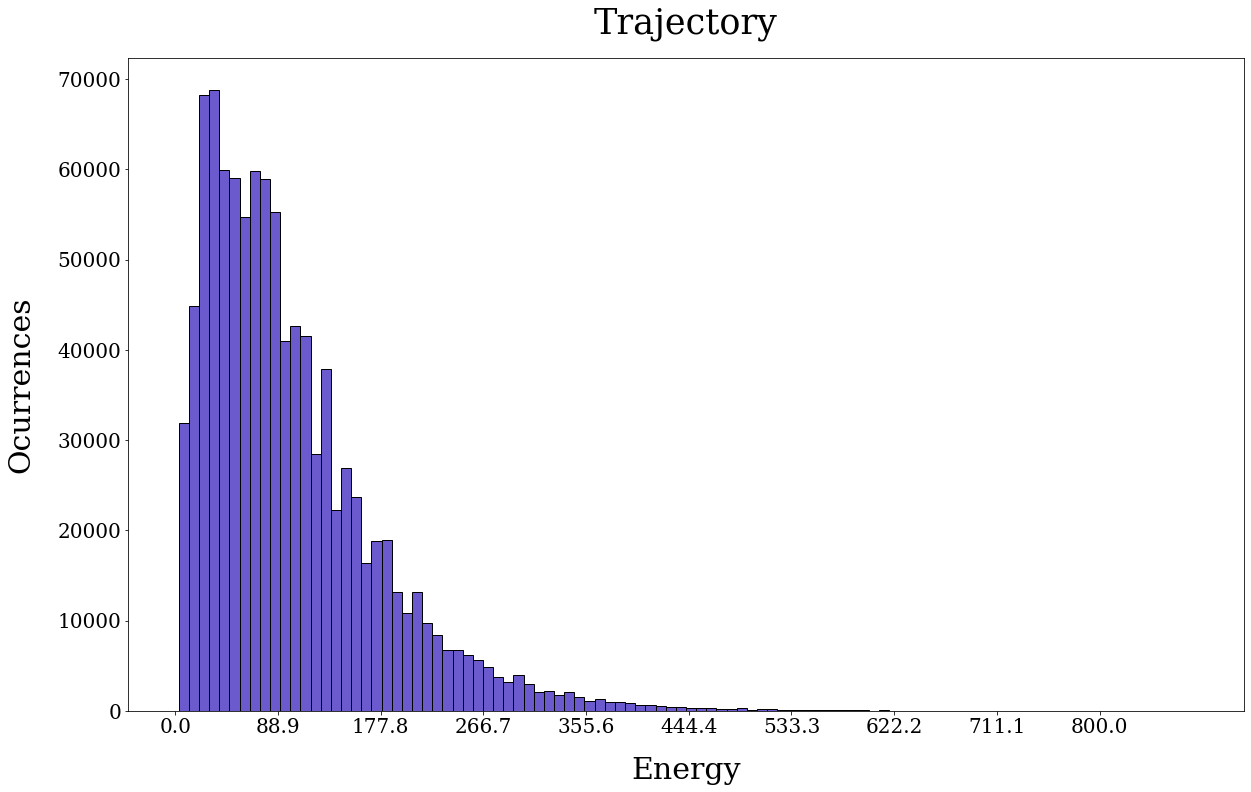

In [6]:
fig1 = pyplot.figure(figsize = (20,12))
pyplot.title(r'Trajectory', fontsize = 35, pad = 25)
# pyplot.grid(linestyle = '--', alpha = 1, linewidth = 2)
# pyplot.xlim(0,15)
pyplot.xticks(x_dummy,fontsize = 20)
pyplot.xlabel(r"Energy", fontsize = 30, labelpad = 20)
pyplot.ylabel(r"Ocurrences", fontsize = 30, labelpad = 22)
pyplot.yticks(fontsize = 20)
pyplot.hist(Energy, bins = 100, edgecolor = 'k', color = 'slateblue')
# fig1.savefig("/home/thanikkitz/Pega/CINV-don_elias/Clases_doc/Bio_Compu/Tarea1/Informe/Figs/P3/IG-1.pdf", bbox_inches = 'tight')

In [3]:
traj.close()

In [8]:
Cycle = []
Energy_2 = []
for lineS in en_dist:
    line = lineS.split()
    if '#' not in line[0]:
        Energy_2.append(float(line[0]))
        Cycle.append(float(line[1]))

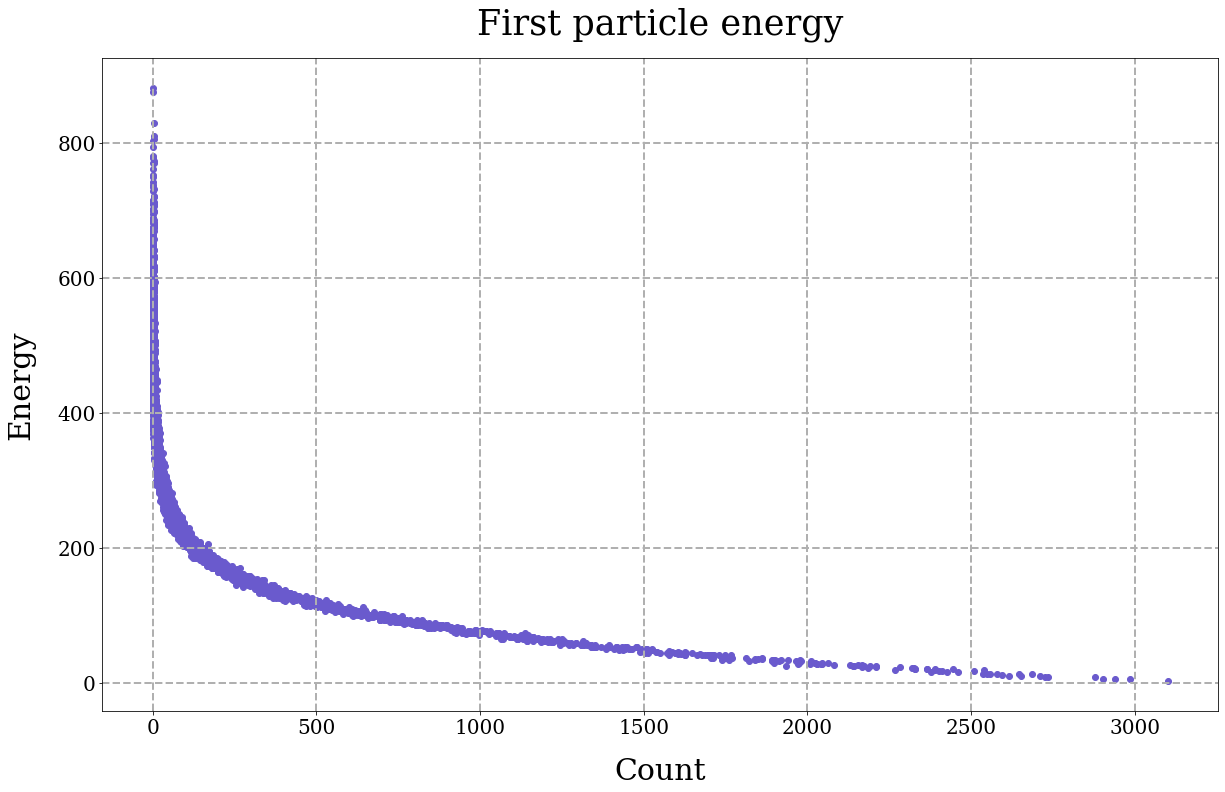

In [9]:
fig2 = pyplot.figure(figsize = (20,12))
pyplot.grid(linestyle = '--', alpha = 1, linewidth = 2)
# pyplot.yscale('log')
# pyplot.xlim(0,20)
pyplot.xticks(fontsize = 20)
pyplot.title(r'First particle energy', fontsize = 35, pad = 25)
pyplot.xlabel(r"Count", fontsize = 30, labelpad = 20)
pyplot.ylabel(r"Energy", fontsize = 30, labelpad = 22)
pyplot.yticks(fontsize = 20)
pyplot.scatter(Cycle, Energy_2, color = 'slateblue')
# pyplot.legend(fontsize = 30)
# fig2.savefig("/home/thanikkitz/Pega/CINV-don_elias/Clases_doc/Bio_Compu/Tarea1/Informe/Figs/IG-scatter.pdf", bbox_inches = 'tight')

In [4]:
traj.close()
en_dist.close()

## Experimento de Ideal-Gas v2.0

In [3]:
traj2 = open("StatMechPrograms/IdealGasEnergy/et.dat", 'r')
en_dist2 = open("StatMechPrograms/IdealGasEnergy/energy_distribution.dat", 'r')

In [4]:
Energy2 = []
Cycle = []
for lineS in traj2:
    line = lineS.split()
    if '#' not in line[0]:
        Energy2.append(float(line[1]))
        Cycle.append(float(line[0]))
        
Cycle2 = []
Energy2_2 = []
for lineS in en_dist2:
    line = lineS.split()
    if '#' not in line[0]:
        Energy2_2.append(float(line[0]))
        Cycle2.append(float(line[1]))

In [5]:
log_data = numpy.log(Energy2)
m_b = numpy.polyfit(Cycle, log_data, 1)
x_values = numpy.exp(m_b[1])*numpy.exp(m_b[0]*numpy.array(Cycle))
x_values = numpy.unique(x_values)

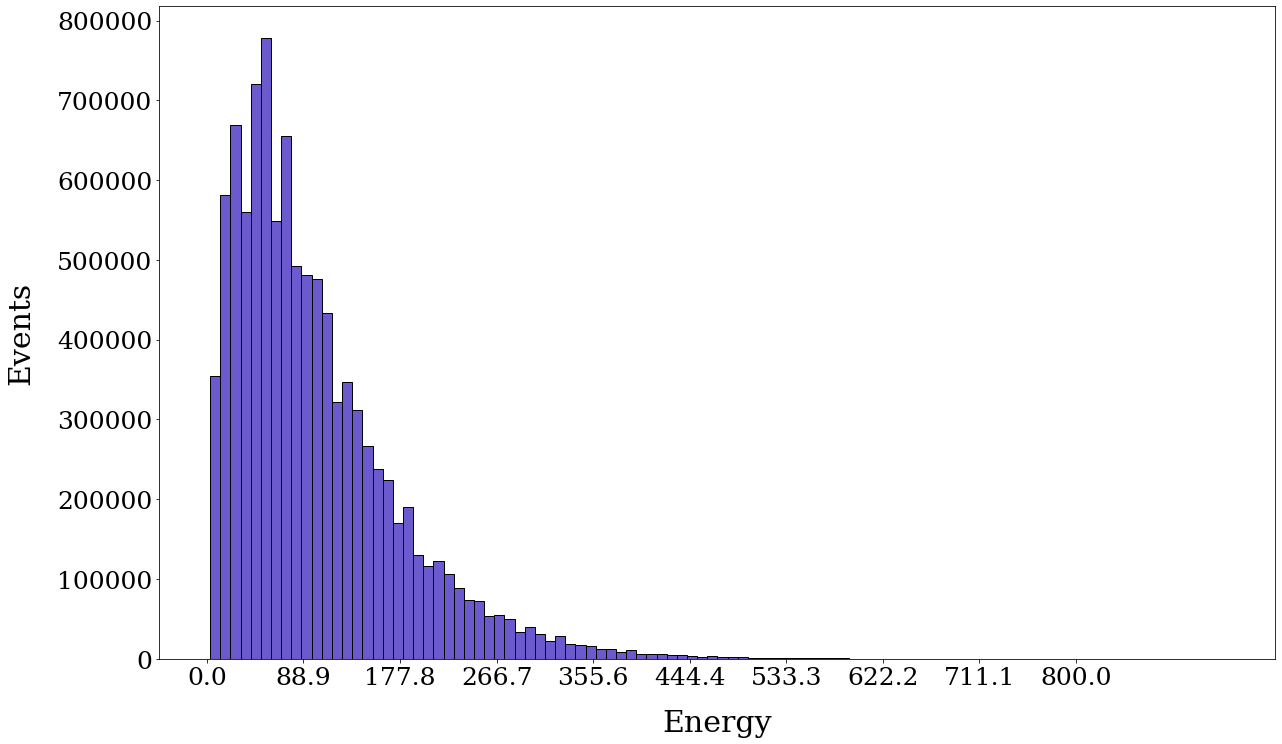

In [107]:
fig1_1 = pyplot.figure(figsize = (20,12))
# pyplot.title(r'Trajectory', fontsize = 35, pad = 25)
# pyplot.grid(linestyle = '--', alpha = 1, linewidth = 2)
# pyplot.xlim(0,15)
pyplot.xticks(x_dummy,fontsize = 25);
pyplot.xlabel(r"Energy", fontsize = 30, labelpad = 20)
pyplot.ylabel(r"Events", fontsize = 30, labelpad = 22)
pyplot.yticks(fontsize = 25)
pyplot.hist(Energy2, bins = 100, edgecolor = 'k', color = 'slateblue');
fig1_1.savefig("/home/thanikkitz/Pega/CINV-don_elias/Clases_doc/Bio_Compu/Tarea1/Informe/Figs/IG-hist.pdf", bbox_inches = 'tight')

In [82]:
from scipy.optimize import curve_fit
def exponential(a, x, b):
    return a*numpy.exp(x*b)
pars, cov = curve_fit(f = exponential, xdata = Cycle2, ydata = Energy2_2)

In [105]:
print(pars)
print(numpy.max(Cycle2))

[100.5017278 -99.4982722]
31924.0


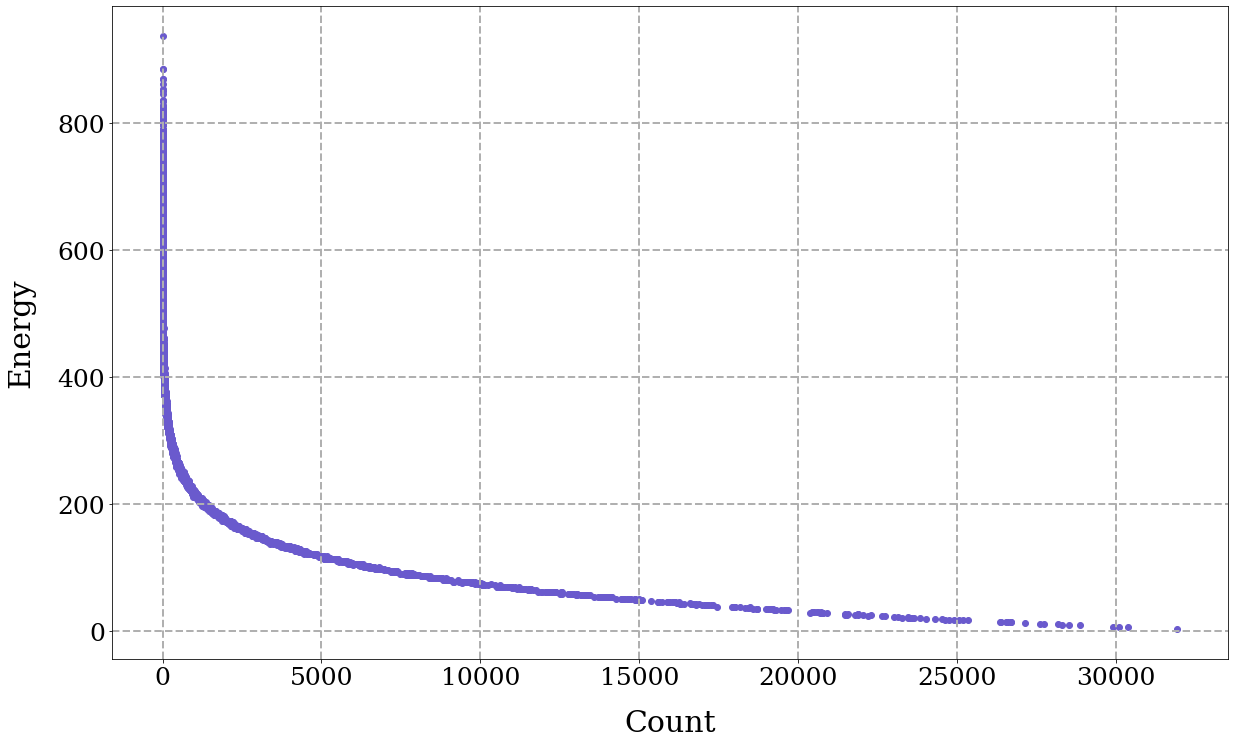

In [113]:
fig2_1 = pyplot.figure(figsize = (20,12))
pyplot.grid(linestyle = '--', alpha = 1, linewidth = 2)
# pyplot.yscale('log')
# pyplot.xlim(0,20)
pyplot.xticks(fontsize = 25)
# pyplot.title(r'First particle energy', fontsize = 35, pad = 25)
pyplot.xlabel(r"Count", fontsize = 30, labelpad = 20)
pyplot.ylabel(r"Energy", fontsize = 30, labelpad = 22)
pyplot.yticks(fontsize = 25)
pyplot.scatter(Cycle2, Energy2_2, color = 'slateblue')
# pyplot.plot(var_x, var_y)
# pyplot.legend(fontsize = 30)
fig2_1.savefig("/home/thanikkitz/Pega/CINV-don_elias/Clases_doc/Bio_Compu/Tarea1/Informe/Figs/IG-scatter.pdf", bbox_inches = 'tight')

In [15]:
traj2.close()
en_dist2.close()

In [31]:
x_vals = [700,0]
y_vals = [0,31924]

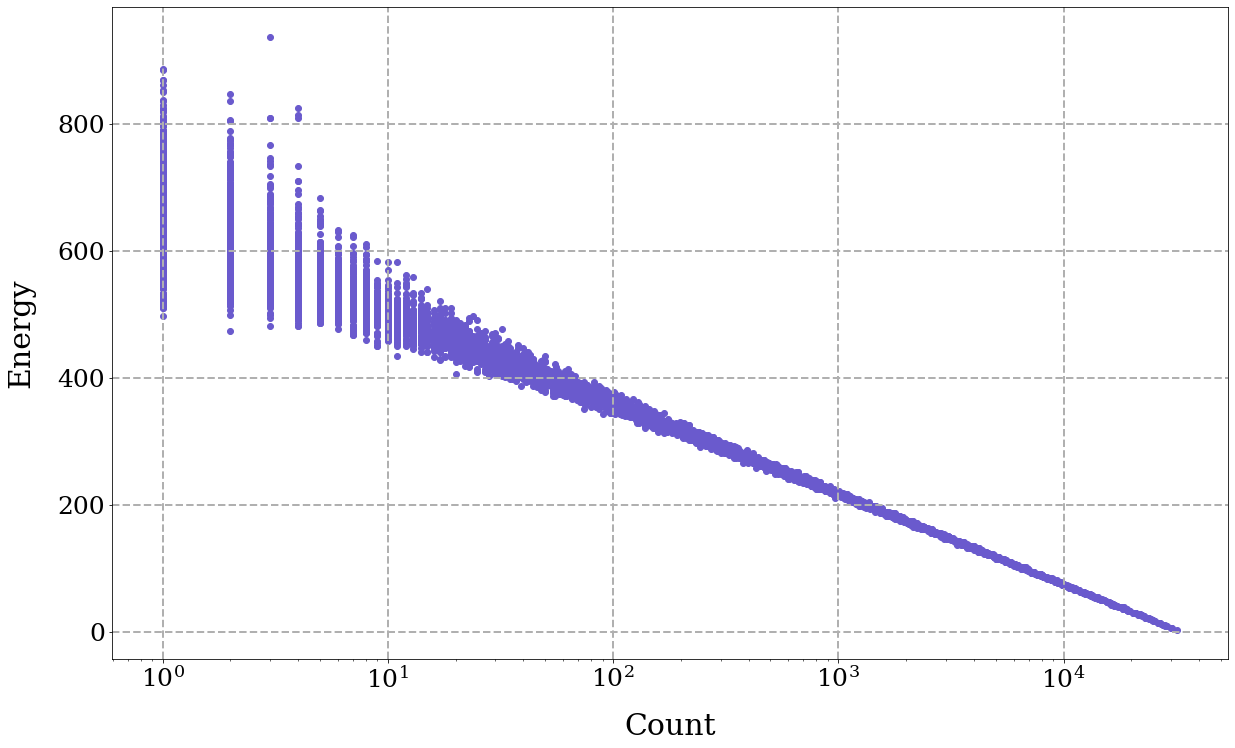

In [8]:
fig2_3 = pyplot.figure(figsize = (20,12))
pyplot.grid(linestyle = '--', alpha = 1, linewidth = 2)
pyplot.xscale('log')
# pyplot.xlim(0,20)
pyplot.xticks(fontsize = 25)
# pyplot.title(r'First particle energy', fontsize = 35, pad = 25)
pyplot.xlabel(r"Count", fontsize = 30, labelpad = 20)
pyplot.ylabel(r"Energy", fontsize = 30, labelpad = 22)
pyplot.yticks(fontsize = 25)
pyplot.scatter(Cycle2, Energy2_2, color = 'slateblue')
# pyplot.plot([1,31924], [650,2], color = 'red')
# pyplot.plot(var_x, var_y)
# pyplot.legend(fontsize = 30)
fig2_3.savefig("/home/thanikkitz/Pega/CINV-don_elias/Clases_doc/Bio_Compu/Tarea1/Informe/Figs/IG-scatter-linear.pdf", bbox_inches = 'tight')

In [96]:
test = 700.5*numpy.exp((-1/699.49827222)*numpy.linspace(0,30000,3000))
x_cosa = numpy.linspace(0,30000,3000)